In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt
sb.set()

In [2]:
df_clean = pd.read_csv('Job_Placement_Clean.csv')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           215 non-null    int64  
 1   GENDER               215 non-null    object 
 2   SSC_PERCENTAGE       215 non-null    float64
 3   SSC_BOARD            215 non-null    object 
 4   HSC_PERCENTAGE       215 non-null    float64
 5   HSC_BOARD            215 non-null    object 
 6   HSC_SUBJECT          215 non-null    object 
 7   DEGREE_PERCENTAGE    215 non-null    float64
 8   UNDERGRAD_DEGREE     215 non-null    object 
 9   WORK_EXPERIENCE      215 non-null    object 
 10  EMP_TEST_PERCENTAGE  215 non-null    float64
 11  SPECIALISATION       215 non-null    object 
 12  MBA_PERCENTAGE       215 non-null    float64
 13  STATUS               215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


# **Exploratory Data Analysis on Categorical Variables**

The categorical variables in the dataset are as follows:
> 1. gender : Gender of the candidate
> 2. ssc_board : Board of education for ssc exams
> 3. hsc_borad : Board of education for hsc exams
> 4. hsc_subject : Subject of study for hsc
> 5. undergrad_degree : Undergrad degree majors
> 6. work_experience : Past work experience
> 7. specialization : Postgrad degree majors - (MBA specialization)
> 8. status (RESPONSE VARIABLE) : Status of placement.


## Univariate Distributions

Placed        148
Not Placed     67
Name: STATUS, dtype: int64


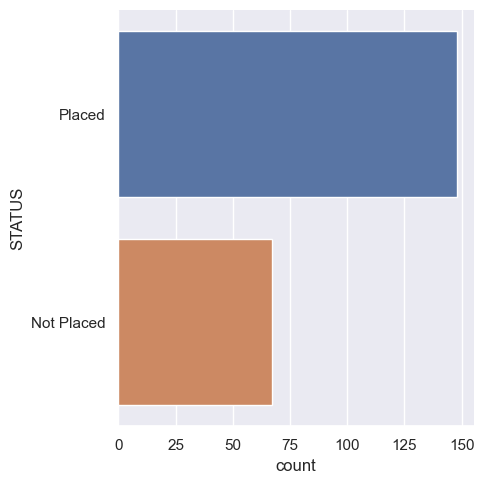

In [3]:
# 'Status' class distribution
print(df_clean["STATUS"].value_counts())
sb.catplot(y = "STATUS", data = df_clean, kind = "count")

In [4]:
print("Percentage of non-placed samples:", len(df_clean[df_clean['STATUS']=='Not Placed'])/len(df_clean['STATUS']) * 100)

Percentage of non-placed samples: 31.16279069767442


Ratio of those with job: without job  is about **2 : 1**.

Classes are imbalanced but there is **no need to do resampling since the data of 'not placed' is only >30% of the whole dataset (mild degree of imbalance)** according to [Google Developers Machine Learning Imbalanced Data](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)

M    139
F     76
Name: GENDER, dtype: int64


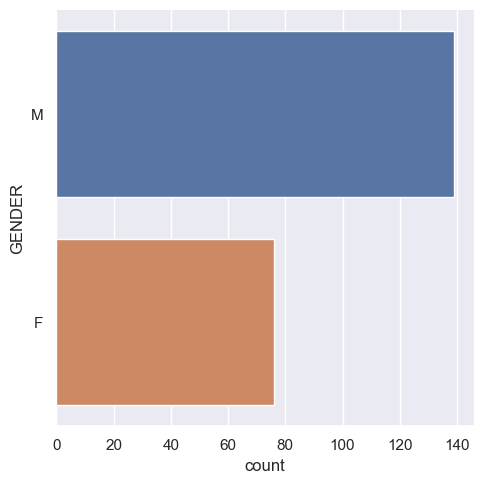

In [5]:
# Number of gender in dataset
print(df_clean["GENDER"].value_counts())
sb.catplot(y = "GENDER", data = df_clean, kind = "count")

Gender distribution: Almost twice as many males than females

No     141
Yes     74
Name: WORK_EXPERIENCE, dtype: int64


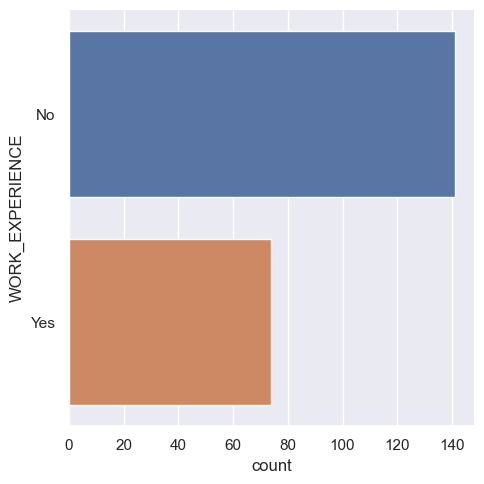

In [6]:
# Number of people with work experience
print(df_clean["WORK_EXPERIENCE"].value_counts())
sb.catplot(y = "WORK_EXPERIENCE", data = df_clean, kind = "count")

Work Experience distribution: Almost twice as many people do not have any work experience

Number of types of Board of education : 2
Central    116
Others      99
Name: SSC_BOARD, dtype: int64


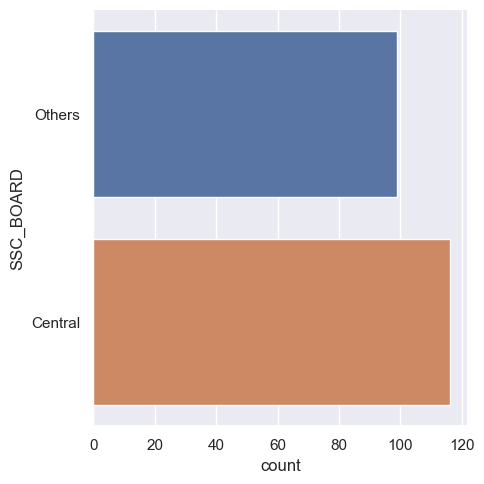

In [7]:
# Number of types of Board of education for ssc exams
print("Number of types of Board of education :", len(df_clean["SSC_BOARD"].unique()))
print(df_clean["SSC_BOARD"].value_counts())
sb.catplot(y = "SSC_BOARD", data = df_clean, kind = "count")

SSC board of education distribution: Almost equal with 17% more people that took the Central examinations

Number of types of Board of education : 2
Others     131
Central     84
Name: HSC_BOARD, dtype: int64


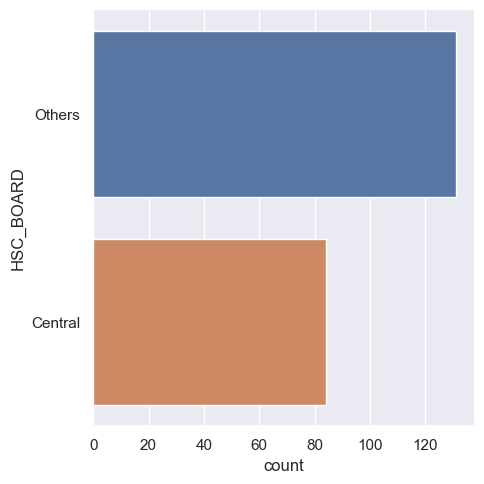

In [8]:
# Number of types of Board of education for hsc exams
print("Number of types of Board of education :", len(df_clean["HSC_BOARD"].unique()))
print(df_clean["HSC_BOARD"].value_counts())
sb.catplot(y = "HSC_BOARD", data = df_clean, kind = "count")

HSC board of education distribution: More people did not take the central exams

Number of types of hsc subjects : 3
Commerce    113
Science      91
Arts         11
Name: HSC_SUBJECT, dtype: int64


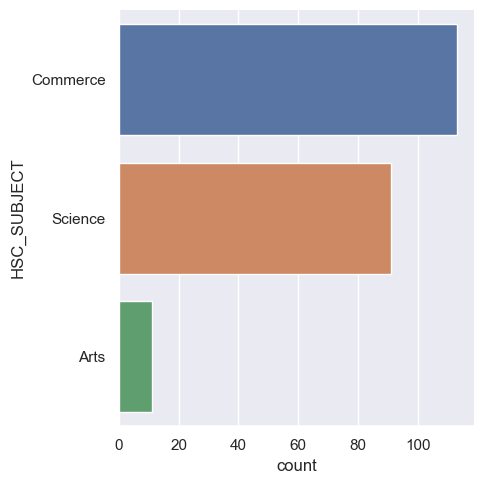

In [9]:
# Number of types of hsc subjects
print("Number of types of hsc subjects :", len(df_clean["HSC_SUBJECT"].unique()))
print(df_clean["HSC_SUBJECT"].value_counts())
sb.catplot(y = "HSC_SUBJECT", data = df_clean, kind = "count")

Number of types of undergrad degrees : 3
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: UNDERGRAD_DEGREE, dtype: int64


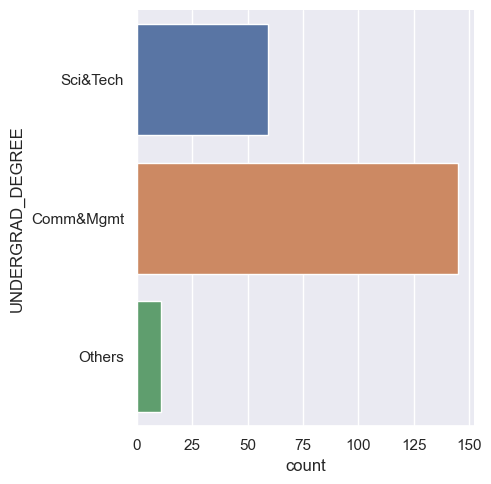

In [10]:
# Number of types of undergrad degrees
print("Number of types of undergrad degrees :", len(df_clean["UNDERGRAD_DEGREE"].unique()))
print(df_clean["UNDERGRAD_DEGREE"].value_counts())
sb.catplot(y = "UNDERGRAD_DEGREE", data = df_clean, kind = "count")

Number of types of specialisation : 2
Mkt&Fin    120
Mkt&HR      95
Name: SPECIALISATION, dtype: int64


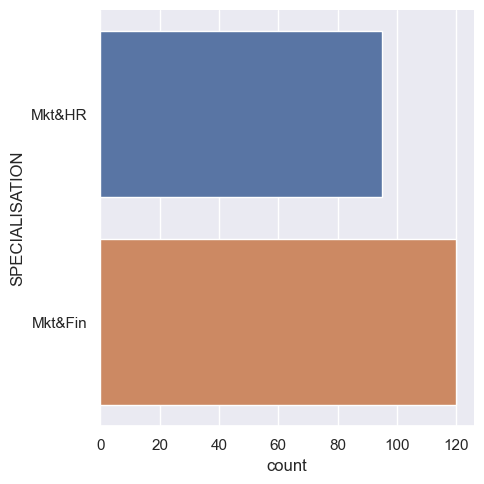

In [11]:
# Number of types of specialisation
print("Number of types of specialisation :", len(df_clean["SPECIALISATION"].unique()))
print(df_clean["SPECIALISATION"].value_counts())
sb.catplot(y = "SPECIALISATION", data = df_clean, kind = "count")

---
## Relationship between categoric variables (excluding 'STATUS')

We want to see the relationship between discipline/subjects taken at different educational levels

<AxesSubplot:xlabel='SPECIALISATION', ylabel='HSC_SUBJECT'>

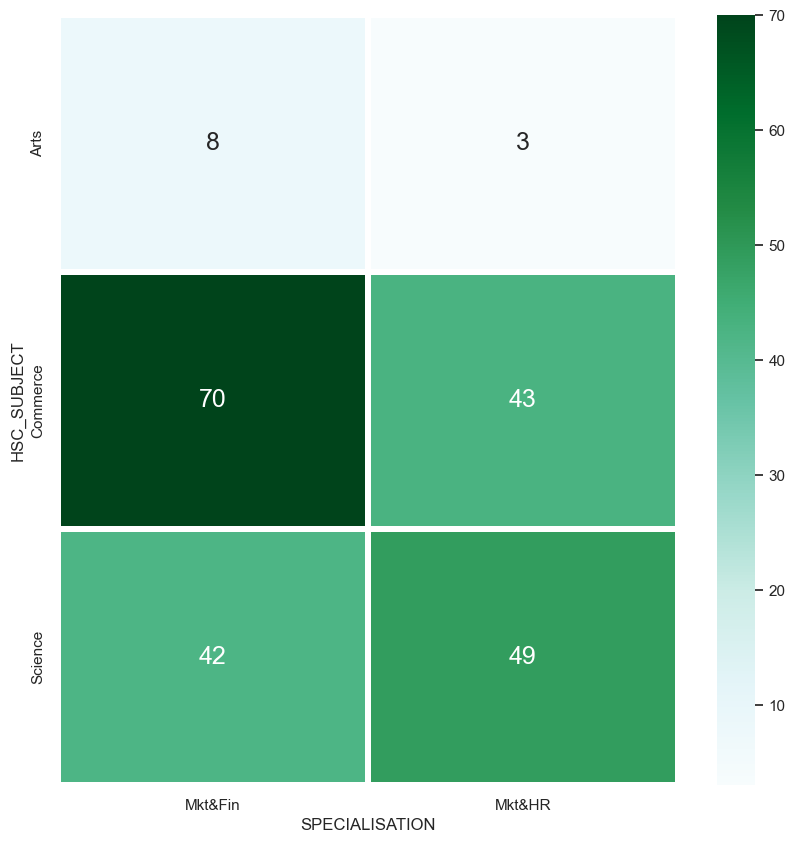

In [12]:
# Distribution of higher secondary school subjects and mba specialisation
f = plt.figure(figsize=(10, 10))
sb.heatmap(df_clean.groupby(['HSC_SUBJECT', 'SPECIALISATION']).size().unstack(), 
           linewidths = 4, annot = True, annot_kws = {"size": 18}, cmap = "BuGn", fmt='g')

<AxesSubplot:xlabel='UNDERGRAD_DEGREE', ylabel='HSC_SUBJECT'>

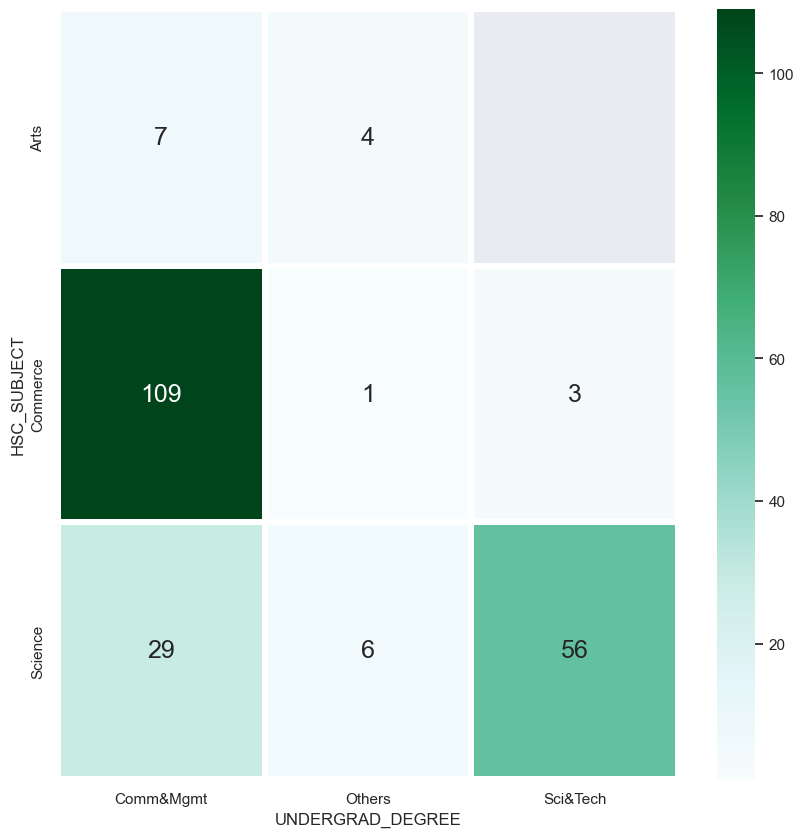

In [13]:
# Distribution of higher secondary school subjects and undergrad degrees
f = plt.figure(figsize=(10, 10))
sb.heatmap(df_clean.groupby(['HSC_SUBJECT', 'UNDERGRAD_DEGREE']).size().unstack(), 
           linewidths = 4, annot = True, annot_kws = {"size": 18}, cmap = "BuGn", fmt='g')

<AxesSubplot:xlabel='SPECIALISATION', ylabel='UNDERGRAD_DEGREE'>

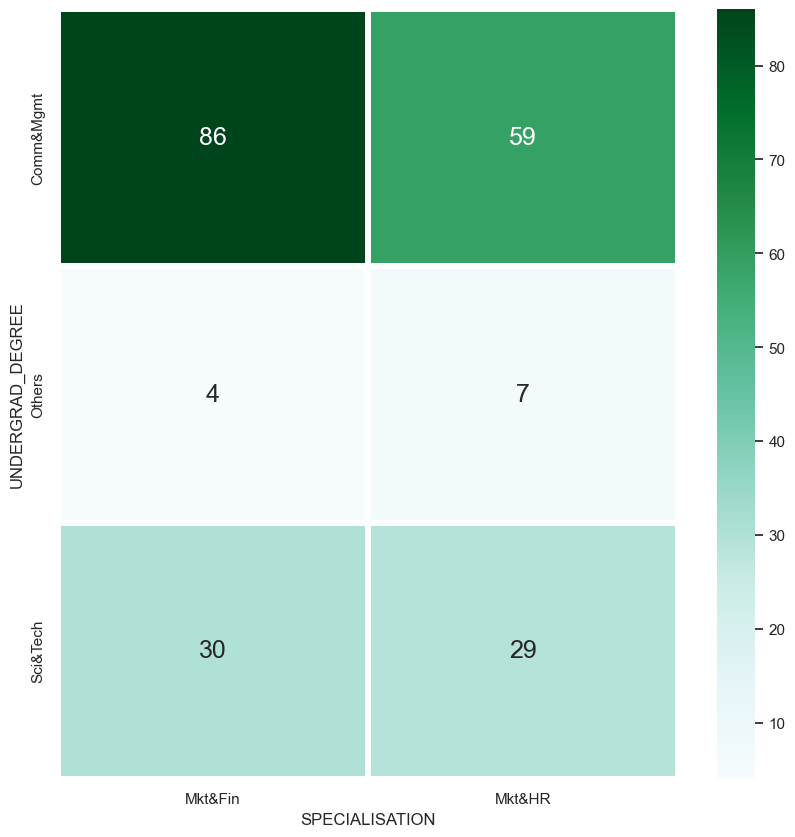

In [14]:
# Distribution of undergrad degrees and specialisation
f = plt.figure(figsize=(10, 10))
sb.heatmap(df_clean.groupby(['UNDERGRAD_DEGREE', 'SPECIALISATION']).size().unstack(), 
           linewidths = 4, annot = True, annot_kws = {"size": 18}, cmap = "BuGn", fmt='g')

---
## Relationship between categorical variables and 'Status' using Chi-Square Test of Independence

**We will use the Chi-Square Test of Independence to show the dependency relationship between each categorical variable and the job placement status.**

The Chi-Square test is a test that identifies whether there are any significant differences between the observed number of occurrences of an event and the expected number of occurrences or not.

The formula for calculating the Chi-Square (X²) is: 
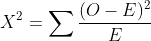 where O is the observed value and the E is the expected value.

**We will be comparing our Chi-square value with the corresponding critical value highlighted in the green column, with respect to their degrees of freedom.**

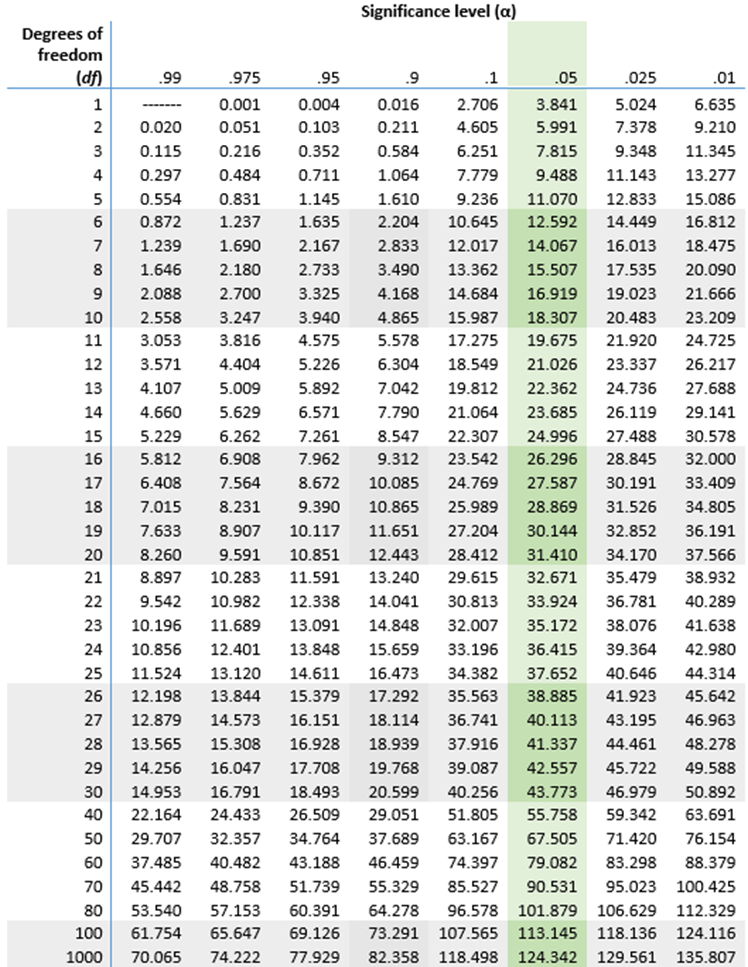


In [15]:
# import relevant module for chi-square test
from scipy.stats import chi2_contingency

Text(0.5, 1.0, 'Gender vs Job Placement Status')

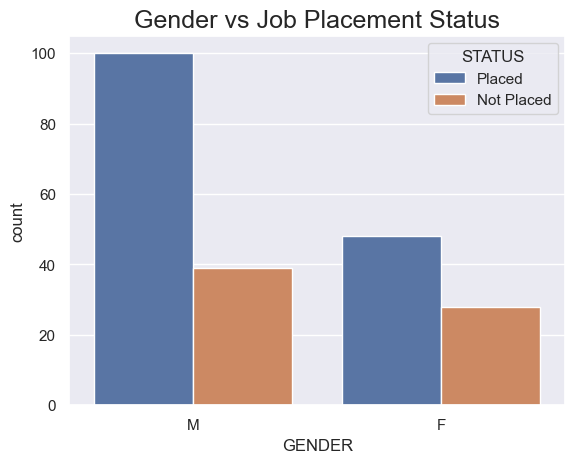

In [16]:
# Relationship between Gender and Job Placement Status
chart1 = sb.countplot(data=df_clean, x="GENDER", hue="STATUS")
chart1.set_title('Gender vs Job Placement Status', fontdict={'size': 18})

More males were hired than females.



Chi-square statistic: 1.3817539668505108
Degrees of freedom: 1
P-value: 0.23980260881037566
Expected values: [[23.68372093 52.31627907]
 [43.31627907 95.68372093]]


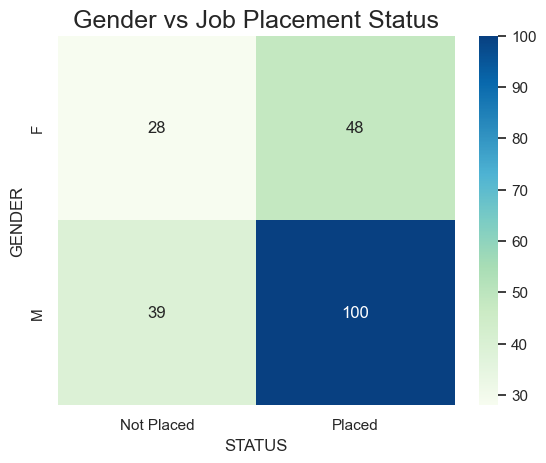

In [17]:
# Create a contingency table
cont_table = pd.crosstab(df_clean["GENDER"], df_clean['STATUS'])

# Plot the contingency table as a heatmap
chart2= sb.heatmap(cont_table, cmap="GnBu", annot=True, fmt="d")
chart2.set_title('Gender vs Job Placement Status', fontdict={'size': 18})

# Perform chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(cont_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("P-value:", p_val)
print("Expected values:", ex)

Since for deg of freedom =1, Chi-square = 1.382< critical value 3.841, we cannot reject the null hypothesis and so **status does not have a strong relationship with gender.**

Text(0.5, 1.0, 'Undergraduate Degree vs Job Placement Status')

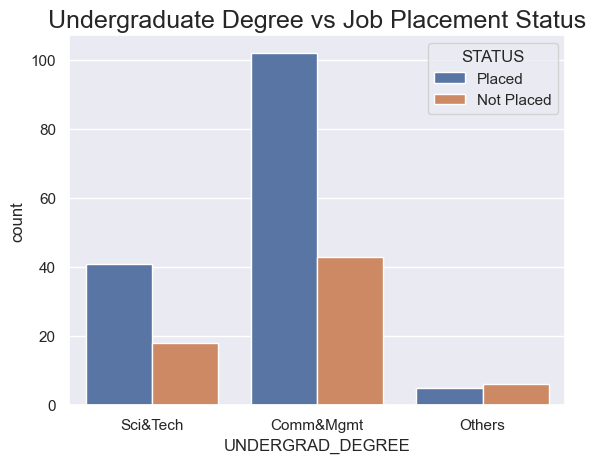

In [18]:
# Relationship between Undergrad Degree and Job Placement Status
chart1 = sb.countplot(data=df_clean, x="UNDERGRAD_DEGREE", hue="STATUS")
chart1.set_title('Undergraduate Degree vs Job Placement Status', fontdict={'size': 18})

Most people who are hired took Communications and Management as an undergraduate degree.

Chi-square statistic: 2.9690428771222925
Degrees of freedom: 2
P-value: 0.22661076190356658
Expected values: [[45.18604651 99.81395349]
 [ 3.42790698  7.57209302]
 [18.38604651 40.61395349]]


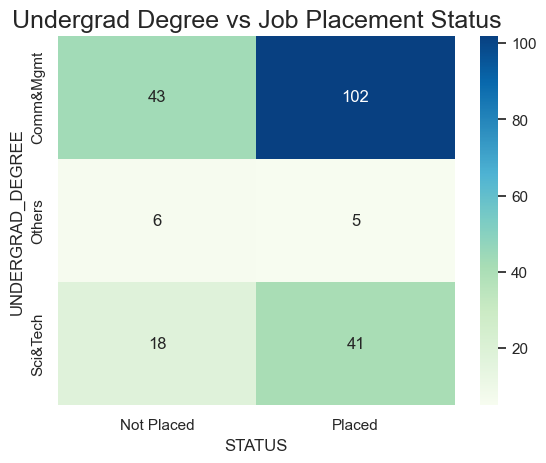

In [19]:
# Create a contingency table 
cont_table = pd.crosstab(df_clean["UNDERGRAD_DEGREE"], df_clean['STATUS'])

# Plot the contingency table as a heatmap
chart2= sb.heatmap(cont_table, cmap="GnBu", annot=True, fmt="d")
chart2.set_title('Undergrad Degree vs Job Placement Status', fontdict={'size': 18})

# Perform chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(cont_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("P-value:", p_val)
print("Expected values:", ex)

Since for deg of freedom =2, Chi-square = 2.969 < critical value 5.991, we cannot reject the null hypothesis and so **status does not have a strong relationship with type of undergrad degree held.**

Text(0.5, 1.0, 'Specialisation vs Job Placement Status')

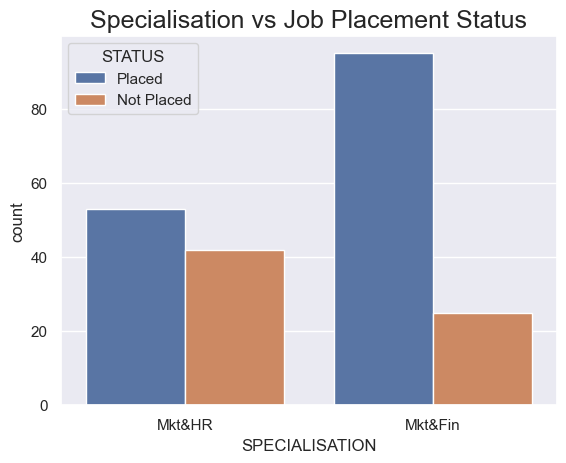

In [20]:
# Relationship between Specialisation and Job Placement Status
chart1 = sb.countplot(data=df_clean, x="SPECIALISATION", hue="STATUS")
chart1.set_title('Specialisation vs Job Placement Status', fontdict={'size': 18})

More people who are hired took Marketing and Finance as a specialisation.

Chi-square statistic: 12.440229009203623
Degrees of freedom: 1
P-value: 0.00042018425858864284
Expected values: [[37.39534884 82.60465116]
 [29.60465116 65.39534884]]


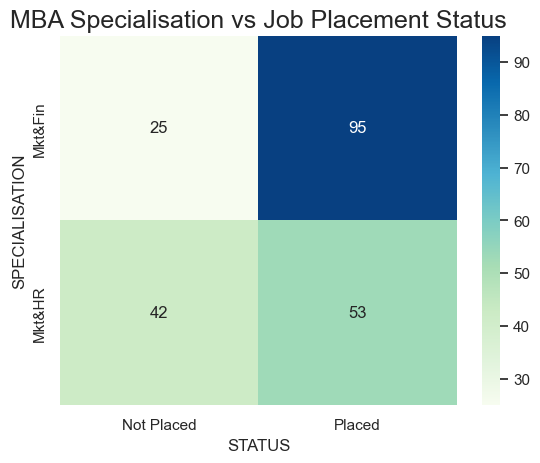

In [21]:
# Create a contingency table 
cont_table = pd.crosstab(df_clean["SPECIALISATION"], df_clean['STATUS'])

# Plot the contingency table as a heatmap
chart2= sb.heatmap(cont_table, cmap="GnBu", annot=True, fmt="d")
chart2.set_title('MBA Specialisation vs Job Placement Status', fontdict={'size': 18})

# Perform chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(cont_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("P-value:", p_val)
print("Expected values:", ex)

Since for deg of freedom =1, Chi-square = 12.440> critical value 3.841, we can reject the null hypothesis and so **status has a strong relationship with MBA specialisation.**

Text(0.5, 1.0, 'Work Experience vs Job Placement Status')

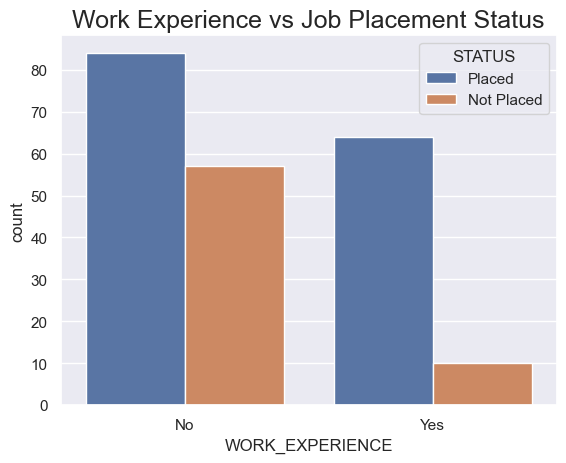

In [22]:
# Relationship between Work Experience and Job Placement Status
chart1 = sb.countplot(data=df_clean, x="WORK_EXPERIENCE", hue="STATUS")
chart1.set_title('Work Experience vs Job Placement Status', fontdict={'size': 18})


Most people who are hired have work experience.

Chi-square statistic: 15.154425347637423
Degrees of freedom: 1
P-value: 9.906584720516494e-05
Expected values: [[43.93953488 97.06046512]
 [23.06046512 50.93953488]]


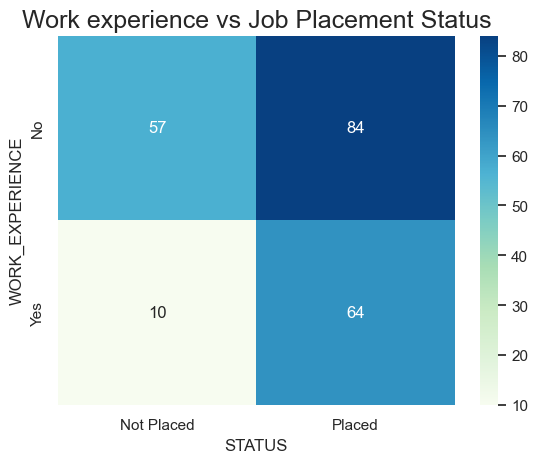

In [23]:
# Create a contingency table 
cont_table = pd.crosstab(df_clean["WORK_EXPERIENCE"], df_clean['STATUS'])

# Plot the contingency table as a heatmap
chart2= sb.heatmap(cont_table, cmap="GnBu", annot=True, fmt="d")
chart2.set_title('Work experience vs Job Placement Status', fontdict={'size': 18})

# Perform chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(cont_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("P-value:", p_val)
print("Expected values:", ex)

Since for deg of freedom =1, Chi-square = 15.154> critical value 3.841, we can reject the null hypothesis and so **status has a strong relationship with work experience.**

Text(0.5, 1.0, 'Board of education for ssc exams vs Job Placement Status')

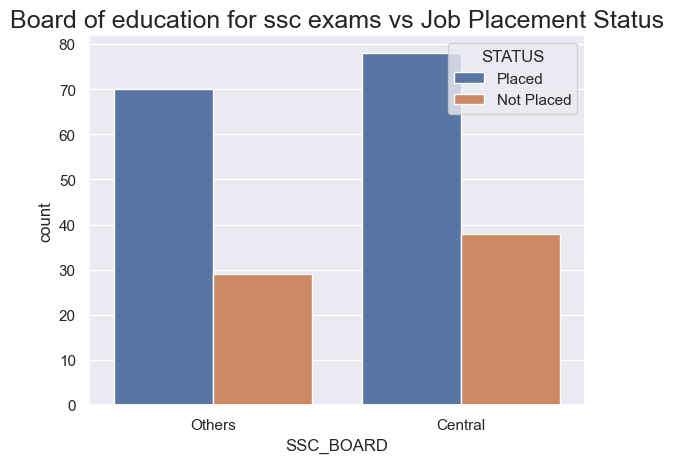

In [24]:
# Relationship between Board of education for ssc exams and Job Placement Status
chart1 = sb.countplot(data=df_clean, x="SSC_BOARD", hue="STATUS")
chart1.set_title('Board of education for ssc exams vs Job Placement Status', fontdict={'size': 18})

Most people who are hired took their senior secondary level exams in Central area.

Chi-square statistic: 0.15933127499487468
Degrees of freedom: 1
P-value: 0.6897729431530739
Expected values: [[36.14883721 79.85116279]
 [30.85116279 68.14883721]]


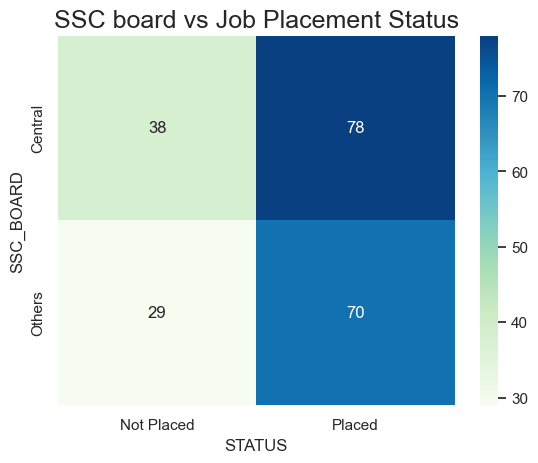

In [25]:
# Create a contingency table 
cont_table = pd.crosstab(df_clean["SSC_BOARD"], df_clean['STATUS'])

# Plot the contingency table as a heatmap
chart2= sb.heatmap(cont_table, cmap="GnBu", annot=True, fmt="d")
chart2.set_title('SSC board vs Job Placement Status', fontdict={'size': 18})

# Perform chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(cont_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("P-value:", p_val)
print("Expected values:", ex)

Since for deg of freedom =1, Chi-square = 0.159< critical value 3.841, we cannot reject the null hypothesis and **so status does not have a strong relationship with ssc board.**

Text(0.5, 1.0, 'Board of education for hsc exams vs Job Placement Status')

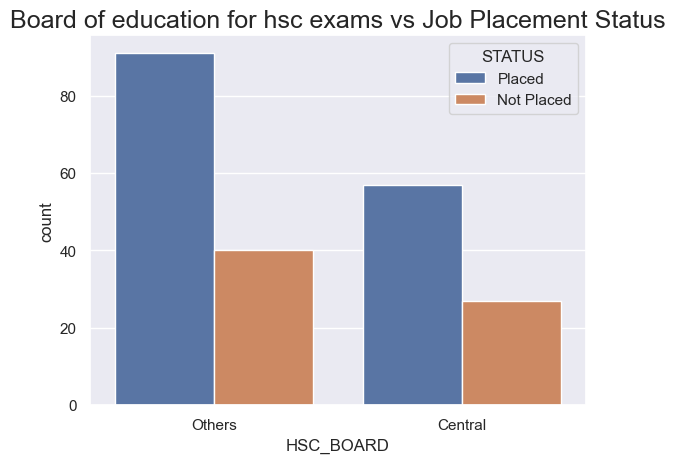

In [26]:
# Relationship between Board of education for hsc exams and Job Placement Status
chart1 = sb.countplot(data=df_clean, x="HSC_BOARD", hue="STATUS")
chart1.set_title('Board of education for hsc exams vs Job Placement Status', fontdict={'size': 18})

Most people who are hired took their higher secondary level exams in other areas.

Chi-square statistic: 0.009517458006762429
Degrees of freedom: 1
P-value: 0.9222837052885
Expected values: [[26.17674419 57.82325581]
 [40.82325581 90.17674419]]


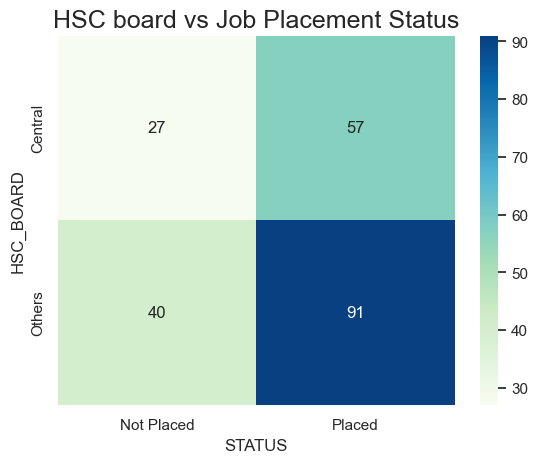

In [27]:
# Create a contingency table 
cont_table = pd.crosstab(df_clean["HSC_BOARD"], df_clean['STATUS'])

# Plot the contingency table as a heatmap
chart2= sb.heatmap(cont_table, cmap="GnBu", annot=True, fmt="d")
chart2.set_title('HSC board vs Job Placement Status', fontdict={'size': 18})

# Perform chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(cont_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("P-value:", p_val)
print("Expected values:", ex)

Since for deg of freedom =1, Chi-square = 0.00952< critical value 3.841, we cannot reject the null hypothesis and so **status does not have a strong relationship with hsc board.**

Text(0.5, 1.0, 'hsc subjects vs Job Placement Status')

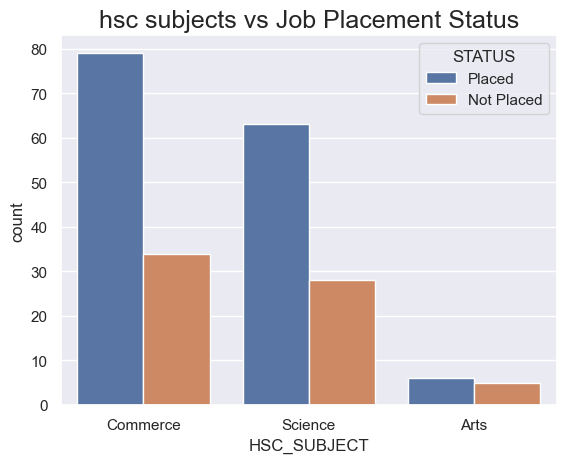

In [28]:
#Relationship between Number of types of hsc subjects and Job Placement Status
chart1 = sb.countplot(data=df_clean, x="HSC_SUBJECT", hue="STATUS")
chart1.set_title('hsc subjects vs Job Placement Status', fontdict={'size': 18})

Most people who are hired took Commerce in their higher secondary level.

Chi-square statistic: 1.114745132708414
Degrees of freedom: 2
P-value: 0.5727118511343621
Expected values: [[ 3.42790698  7.57209302]
 [35.21395349 77.78604651]
 [28.35813953 62.64186047]]


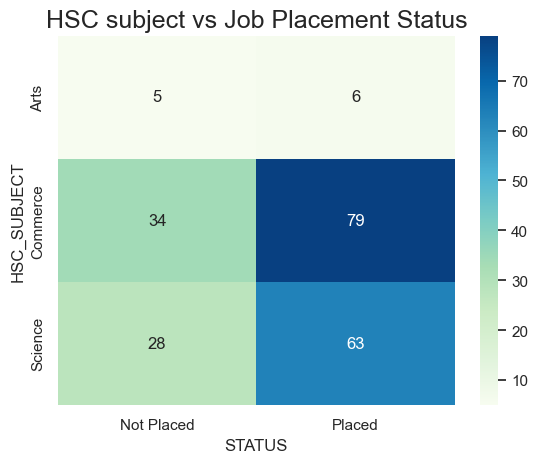

In [29]:
# Create a contingency table 
cont_table = pd.crosstab(df_clean["HSC_SUBJECT"], df_clean['STATUS'])

# Plot the contingency table as a heatmap
chart2= sb.heatmap(cont_table, cmap="GnBu", annot=True, fmt="d")
chart2.set_title('HSC subject vs Job Placement Status', fontdict={'size': 18})

# Perform chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(cont_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("P-value:", p_val)
print("Expected values:", ex)

Since for deg of freedom =2, Chi-square = 1.115 < critical value 3.841, we cannot reject the null hypothesis and so **status does not have a strong relationship with hsc subject.**

---
### Observations from Chi-Square Test

The Chi-Square Test tells us that the variables that have a strong relationshop with job placement status are **work experience and one's MBA specialisation.**